# MNIST Dataset

http://yann.lecun.com/exdb/mnist/

The MNIST dataset was constructed from two datasets of the US National Institute of Standards and Technology (NIST). The training set consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. 

- Contains a training set of 60,000 examples and a test set of 10,000 examples


<img src="https://media.giphy.com/media/IsfrRWvbUdRny/giphy.gif" width="480" height="329" />

#### Getting the Data
- The MNIST dataset is free to download from [here](http://yann.lecun.com/exdb/mnist/)


Alternatively the code segment below can be used to download the images.

In [16]:
# Adapted from :
# (1): https://www.youtube.com/watch?v=6xar6bxD80g

import os,urllib.request

# PROVIDE YOUR DOWNLOAD DIRECTORY HERE
datapath = './data/MNISTData/'  

# CREATING DOWNLOAD DIRECTORY
if not os.path.exists(datapath):
    os.makedirs(datapath)

# URLS TO DOWNLOAD FROM
urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

for url in urls:
    filename = url.split('/')[-1]   # GET FILENAME
    
    if os.path.exists(datapath+filename):
        print(filename, ' already exists')  # CHECK IF FILE EXISTS
    else:
        print('Downloading ',filename)
        urllib.request.urlretrieve (url, datapath+filename) # DOWNLOAD FILE
     
print('All files are available')

train-images-idx3-ubyte.gz  already exists
train-labels-idx1-ubyte.gz  already exists
t10k-images-idx3-ubyte.gz  already exists
t10k-labels-idx1-ubyte.gz  already exists
All files are available


#### Data Format

The MNIST dataset is provided in IDX format. IDX format is a binary file format that must be converted before we can use it our code.

##### Why IDX?
- Performance & Memory Optimization.

Binary file formats perform siginificantly better than other file formats such as CSV. Considering the large volumn of data we're dealing with, IDX is ideal for ensuring compact memory utilization.


In [17]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

##### As given in the original [MNIST Database doccumentation](http://yann.lecun.com/exdb/mnist/)

#### The basic format for images

|Offset | Type               | Value           |   Description                   |
|-------|--------------------|-----------------|---------------------------------|
|0000   |4 byte integer      |0x00000801(2051) |magic number (MSB first)         |
|0004   |4 byte integer      |10000 or 60000   |number of images (test or train) |
|0008   |4 byte integer      |28               |number of rows                   |
|0012   |4 byte integer      |28               |number of columns                |
|0016   |unsigned byte       |??               |pixel intensity (0-255)          |
|0017   |unsigned byte       |??               |pixel intensity (0-255)          |
|...    |...                 |...              |...                              |
|xxxx   |unsigned byte       |??               |pixel intensity (0-255)          |





As detailed above, the first four bytes in the image data is the [Magic Number](https://en.wikipedia.org/wiki/Magic_number_(programming)). This is a unique number that lets the file reader know what file format/protocol to expect. In our case the magic number, in decimal format, is 2051.


##### We can read in the data and confirm this by doing the following:

First we unzip the data. [Gzip](https://docs.python.org/3/library/gzip.html
) is a python library that helps with reading compressed files.

In [18]:
# Adapted from: https://docs.python.org/3/library/gzip.html

# Reading in compressed files
import gzip
# read as sequence of bytes
# mimincs open command in python - but deals with compression
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()


In [19]:
type(file_content) # check data type of the file

bytes

Print the first byte (four elements)

In [20]:
# prints in hex --> \x
file_content[0:4] 

b'\x00\x00\x08\x03'

We now have a handle on our data, and can begin to make sense of its contents. One important thing to note is that the data is stored in [Big Endian format](https://en.wikipedia.org/wiki/Endianness). Essentially, this means the data is stored big-end first. When looking at multiple bytes, the first byte (lowest address) is the biggest.

In [21]:
# MNIST creators suggest reading using a 32 bit integer in highendian order(detailed in docss)
# Big Endian format --> least significant bit first 
int.from_bytes(file_content[0:4], byteorder='big')

2051

##### Magic number confirmed, wohoo!

Following the same method as above, we can continue to view the rest of the content detailed in the table by accessing the bytes at the relevant poistions.

##### Checking the number of images
The MNIST provided table states there should be 1000 images, this is doccumented in the second byte as shown below.

In [22]:

int.from_bytes(file_content[4:8], byteorder='big')

10000

Confirming the number of rows in the images 

In [23]:
int.from_bytes(file_content[8:12], byteorder='big')

28

Confirming the number of columns in the images


In [25]:
int.from_bytes(file_content[12:16], byteorder='big')

28

Now that we have an undersanding of the dimensions and format of our data, we can begin parsing the images. 


#### Parsing the Data

Each byte from 16th byte onward, contains pixel data, and the type of the data is unsigned byte, i.e. each pixel data is contained in a 8-bit binary digit, having value from 0 to 255.

If we parse the 16th binary data byte, and convert to decimal, we will get a value from 0 to 255, which gives us the value of the pixel at the (0,0) co-ordinate of the first Image in the training data-set.

Our image dimensions, as we discovered above - tell us that there will be 28 x 28 pixels in each image. So each image will be 786 bytes in size. We can use Numpy and Matplot to give us a visualisation of these pixels an how they come to form an image.

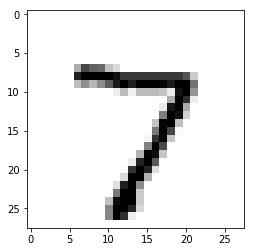

In [26]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')



### Image Labels

  
|Offset | Type               | Value           |   Description                   |
|-------|--------------------|-----------------|---------------------------------|
|0000   |4 byte integer      |0x00000801(2049) |magic number (MSB first)         |
|0004   |4 byte integer      |10000 or 60000   |number of items (test or train)  |
|0008   |unsigned byte       |??               |label                            |
|0009   |unsigned byte       |??               |label                            |
|...    |...                 |...              |...                              |
|xxxx   |unsigned byte       |??               |label                            |


The very same process can be used to read in & parse the corresponding image label data. 


In [27]:
import gzip

# unzip and read the bytes sequence
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

##### Check magic number

In [28]:
int.from_bytes(labels[0:4], byteorder="big")

2049

##### Check that our first label correponds to the image we read in earlier

In [29]:

int.from_bytes(labels[8:9], byteorder="big")

7

### Processing the whole thing!

I created the following script that uses the same processing technique but applied to the entire dataset. 

First define an enum, not essential but handy to avoid mispelling and niggly mistakes. 

In [2]:
# https://docs.python.org/3/library/enum.html
# not essential but useful
# enum for constants relating to MNIST data
from enum import Enum
class MNIST(Enum):
    IMAGES = 2051
    LABELS = 2049
    TRAIN = 'train'
    TEST = 'test'
    TEST_SIZE = 10000
    TRAIN_SIZE = 60000


In [ ]:
# Adapted from :
# (1): https://www.youtube.com/watch?v=6xar6bxD80g
# (2): https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb
# (3): https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1

# Reading in compressed files
import gzip
import numpy as np
# mimincs open command in python - but deals with compression
import os,codecs


# provide your directory with the extracted files here
datapath = './data/MNISTData/'

files = os.listdir(datapath)


#convert byte to int
def byte_to_int(b):
    return int.from_bytes(b, byteorder='big')

# handy structure to hold the data we want to parse
mnist_data = {}
# get every file in the data directory
for file in files:
    print('Beginning processing on: ', file)
    # Unzip the .gz files
    with gzip.open(datapath + file, 'rb') as f:
        file_content = f.read()

    # MAGIC NUMBER : determines whether the it's labels or images we're reading
    type = byte_to_int(file_content[:4])
    print(type)
     # 4-7: LENGTH OF THE ARRAY (DIMENSION 0)
    length = byte_to_int(file_content[4:8])

    # if dealing with the images
    if (type == MNIST.IMAGES.value):
        category = MNIST.IMAGES.name
        num_rows = byte_to_int(file_content[8:12])  # Num of rows  (DIMENSION 1)
        num_cols = byte_to_int(file_content[12:16])  # num of cols  (DIMENSION 2)

        # read the pixel values as integers, offset account for meta data
        parsed = np.frombuffer(file_content,dtype = np.uint8, offset = 16)
        # Reshape the array [NO_OF_SAMPLES x HEIGHT x WIDTH]
        parsed = parsed.reshape(length,num_rows,num_cols)
    # otherwise dealing with label set
    elif(type == MNIST.LABELS.value):
        category = MNIST.LABELS.name
        parsed = np.frombuffer(file_content, dtype=np.uint8, offset=8)
        # reshape the array as number of samples
        parsed = parsed.reshape(length)
    # separate test data from training data - we know which is which from mnist doc detailing set size
    if (length == MNIST.TEST_SIZE.value):
        set = 'test'
    elif (length==MNIST.TRAIN_SIZE.value):
        set = 'train'
    mnist_data[set+'_'+category] = parsed  # Save the parsed data into a dict for convenience


I then use the python Pillow library to save the images as pngs. This is done by converting the np array containing the pixel values.I chose to save each image in a folder named with the corresponding label number. After running the script, it should be sctructured as follows: 
    

In [ ]:
 """
    mnist_images
    ├── test/
        ├── 0
        ├── 1
        ├── ...
        ├── 9
    ├── train/
        ├── 0
        ├── 1
        ├── ...
        ├── 9
"""

In [ ]:
# PIL to save np array as image
from PIL import Image

# path where image will be saved to
image_dir = './mnist_images/'

sets = ['train','test']

for set in sets:   # for train and test set
    images = mnist_data[set+'_' + MNIST.IMAGES.name]
    labels = mnist_data[set+'_'+ MNIST.LABELS.name]
    # num of samples
    no_of_samples = images.shape[0]
     # for every sample
    for indx in range (no_of_samples): 
        # get image
        image = Image.fromarray(images[indx])
        # get label
        label = labels[indx]
          # if directories do not exist then
        if not os.path.exists(image_dir+set+'/'+str(label)+'/'):
             # create train/test directory and class specific subdirectory
            os.makedirs (image_dir+set+'/'+str(label)+'/')
        filenumber = len(os.listdir(image_dir+set+'/'+str(label)+'/'))  # number of files in the directory for naming the file
        # save the image with proper name
        image.save(image_dir+set+'/'+str(label)+'/%05d.png'%(filenumber))

 #### Resources:
- https://betterexplained.com/articles/understanding-big-and-little-endian-byte-order/
- https://en.wikipedia.org/wiki/Endianness
- https://www.youtube.com/watch?v=6xar6bxD80g
- https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1
- https://www.vecteezy.com/members/orangereebok